In [1]:
# Ambil file csv dari folder
#ntar ganti lagi aja pathnya
import pandas as pd
datatest = pd.read_csv("test.csv")
datatrain = pd.read_csv("train.csv")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pip install pycaret

In [ ]:
pip install markupsafe==2.0.1 

In [ ]:
pip install jinja2

In [ ]:
import jinja2

In [4]:
datatest

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [5]:
datatrain

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [6]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [7]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
num_features = datatest.select_dtypes(include=['float64','int64'])
for column in num_features.columns:
    print(column," : ")
    print(datatest[column].value_counts())

id  : 
1       1
672     1
659     1
660     1
661     1
       ..
339     1
340     1
341     1
342     1
1000    1
Name: id, Length: 1000, dtype: int64
battery_power  : 
1074    5
1981    5
529     4
1745    4
1715    4
       ..
1248    1
1392    1
1706    1
1297    1
1185    1
Name: battery_power, Length: 721, dtype: int64
blue  : 
1    516
0    484
Name: blue, dtype: int64
clock_speed  : 
0.5    199
0.6     40
2.6     40
1.4     39
2.9     38
1.3     38
2.1     37
1.6     37
2.5     36
0.9     34
2.7     33
2.8     33
2.4     33
1.1     33
1.8     32
1.7     30
2.2     29
0.8     29
0.7     28
2.3     28
1.9     28
1.5     27
1.2     27
1.0     26
2.0     25
3.0     21
Name: clock_speed, dtype: int64
dual_sim  : 
1    517
0    483
Name: dual_sim, dtype: int64
fc  : 
0     210
1     124
2      97
4      80
5      74
3      70
6      59
7      50
9      41
8      38
10     37
11     29
13     21
12     17
14     16
15     12
16     11
18     10
17      2
19      2
Name: fc, dtype: i

In [9]:
num_features = datatrain.select_dtypes(include=['float64','int64'])
for column in num_features.columns:
    print(column," : ")
    print(datatrain[column].value_counts())

battery_power  : 
1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: battery_power, Length: 1094, dtype: int64
blue  : 
0    1010
1     990
Name: blue, dtype: int64
clock_speed  : 
0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64
dual_sim  : 
1    1019
0     981
Name: dual_sim, dtype: int64
fc  : 
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64
four_g  : 
1    1043
0     957
Name: four_g, dtype: int64
int_memory  : 
27    47
16    45
14    45
57    42
2     42
      ..
22    24
38    23

In [10]:
#Menghitung Missing Values setiap fitur
datatest.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [11]:
#Menghitung Missing Values setiap fitur
datatrain.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
datatest.duplicated().sum()

0

In [13]:
datatrain.duplicated().sum()

0

In [ ]:
#kolom 'id' bukan target menurut gw, jadi ini gak perlu harusnya
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Split into features and target variable
X = datatest.drop(['id'], axis=1)
y = datatest['id']

# Create a Random Forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a dataframe of feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the dataframe by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the feature importances
print(feature_importances)

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Split into features and target variable
X = datatrain.drop(['price_range'], axis=1)
y = datatrain['price_range']

# Create a Random Forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a dataframe of feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the dataframe by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the feature importances
print(feature_importances)


          feature  importance
13            ram    0.867918
0   battery_power    0.051062
11      px_height    0.029619
12       px_width    0.028545
8       mobile_wt    0.004107
6      int_memory    0.002617
7           m_dep    0.001959
15           sc_w    0.001938
10             pc    0.001904
16      talk_time    0.001896
2     clock_speed    0.001676
14           sc_h    0.001587
4              fc    0.001552
9         n_cores    0.001488
5          four_g    0.000438
17        three_g    0.000384
18   touch_screen    0.000351
19           wifi    0.000344
1            blue    0.000318
3        dual_sim    0.000298


In [15]:
# Calculate correlation matrix
corr_matrix = datatest.corr()

# Print correlation matrix
corr_matrix

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,1.000000,-0.021511,0.000464,0.035917,-0.002721,0.016934,0.030921,-0.014023,-0.002794,-0.007541,...,0.001969,-0.025056,-0.012138,-0.043442,-0.011972,0.002918,0.030807,4.957099e-02,3.976791e-02,-0.036643
battery_power,-0.021511,1.000000,-0.046610,-0.039075,-0.061171,-0.007846,-0.042520,0.003751,-0.009065,-0.047065,...,0.012847,0.048647,0.053365,-0.032366,-0.055665,-0.023905,0.015546,3.151417e-02,-1.013784e-02,-0.000414
blue,0.000464,-0.046610,1.000000,0.034754,-0.011100,-0.056063,-0.001169,-0.012416,0.018319,0.023513,...,-0.025247,-0.058810,-0.032054,0.057570,0.012780,0.004223,-0.031995,1.352986e-02,-6.003074e-02,0.025568
clock_speed,0.035917,-0.039075,0.034754,1.000000,-0.012423,0.010127,-0.024665,-0.030487,0.016995,-0.014107,...,0.047469,0.017277,0.070585,-0.000650,-0.039503,-0.027138,-0.078797,-2.140644e-02,6.189276e-02,-0.048593
dual_sim,-0.002721,-0.061171,-0.011100,-0.012423,1.000000,0.057606,0.024907,-0.012158,0.021760,-0.001734,...,0.073936,0.006842,0.015610,0.048171,0.006295,-0.002064,0.004390,6.895838e-04,3.401967e-02,0.031545
fc,0.016934,-0.007846,-0.056063,0.010127,0.057606,1.000000,0.032832,-0.006565,0.020859,0.018353,...,0.659338,-0.017982,0.030550,-0.051997,0.045158,0.006115,-0.051458,-1.112104e-02,1.546706e-02,-0.060373
four_g,0.030921,-0.042520,-0.001169,-0.024665,0.024907,0.032832,1.000000,-0.037488,0.014806,-0.000509,...,0.037669,0.033655,0.036545,0.030821,-0.015087,-0.000893,0.013692,5.535283e-01,-1.000338e-02,-0.035652
int_memory,-0.014023,0.003751,-0.012416,-0.030487,-0.012158,-0.006565,-0.037488,1.000000,-0.004386,-0.010447,...,0.022682,-0.009564,-0.003877,-0.007107,-0.009249,0.024521,0.023759,-1.592239e-02,2.218589e-02,0.011860
m_dep,-0.002794,-0.009065,0.018319,0.016995,0.021760,0.020859,0.014806,-0.004386,1.000000,-0.041994,...,0.012663,0.062559,0.034861,0.018349,-0.026160,-0.023393,0.024124,-2.927827e-02,4.025363e-02,-0.039705
mobile_wt,-0.007541,-0.047065,0.023513,-0.014107,-0.001734,0.018353,-0.000509,-0.010447,-0.041994,1.000000,...,0.027343,0.011157,-0.014577,0.028786,-0.022053,0.022148,-0.021704,6.261881e-03,4.452531e-02,0.069762


In [16]:
# Calculate correlation matrix
corr_matrix1 = datatrain.corr()

# Print correlation matrix
corr_matrix1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [ ]:
#kolom 'id' bukan target menurut gw, jadi ini gak perlu harusnya
# Mengecek kolom/fitur terpenting berdasarkan importance dan korelasi

# Calculate correlation matrix
corr_matrix = datatest.drop(['id'], axis=1).corr()

# Set threshold values for importance and correlation
importance_threshold = 0.05
correlation_threshold = 0.8

# Identify columns to keep based on importance and correlation
important_columns = feature_importances[feature_importances['importance'] >= importance_threshold]['feature']
correlated_columns = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] >= correlation_threshold:
            colname = corr_matrix.columns[i]
            correlated_columns.add(colname)

# Remove columns that are not important or highly correlated with others
columns_to_drop = set(X.columns) - set(important_columns) - correlated_columns
X = X.drop(columns_to_drop, axis=1)

# Print the remaining columns
print(X.columns)

In [17]:
# Mengecek kolom/fitur terpenting berdasarkan importance dan korelasi

# Calculate correlation matrix
corr_matrix1 = datatrain.drop(['price_range'], axis=1).corr()

# Set threshold values for importance and correlation
importance_threshold = 0.05
correlation_threshold = 0.8

# Identify columns to keep based on importance and correlation
important_columns = feature_importances[feature_importances['importance'] >= importance_threshold]['feature']
correlated_columns = set()
for i in range(len(corr_matrix1.columns)):
    for j in range(i):
        if corr_matrix1.iloc[i, j] >= correlation_threshold:
            colname = corr_matrix1.columns[i]
            correlated_columns.add(colname)

# Remove columns that are not important or highly correlated with others
columns_to_drop = set(X.columns) - set(important_columns) - correlated_columns
X = X.drop(columns_to_drop, axis=1)

# Print the remaining columns
print(X.columns)

Index(['battery_power', 'ram'], dtype='object')


In [ ]:
# Mengecek kolom/fitur terpenting berdasarkan importance dan korelasi

# Calculate correlation matrix
corr_matrix2 = datatest.drop(['id'], axis=1).corr()

# Set threshold values for importance and correlation
correlation_threshold = 0.8

# Identify columns to keep based on importance and correlation
correlated_columns = set()
for i in range(len(corr_matrix2.columns)):
    for j in range(i):
        if corr_matrix2.iloc[i, j] >= correlation_threshold:
            colname = corr_matrix2.columns[i]
            correlated_columns.add(colname)

# Remove columns that are not important or highly correlated with others
columns_to_drop = set(X.columns) - correlated_columns
X = X.drop(columns_to_drop, axis=1)

# Print the remaining columns
print(X.columns)

In [ ]:
# Mengecek kolom/fitur terpenting berdasarkan korelasi saja

# menghitung matriks korelasi
corr_matrix3 = datatrain.drop(['price_range'], axis=1).corr()

# Meng-set nilai threshold untuk korelasi
correlation_threshold = 0.8

# Identifikasi kolom yang disimpan berdasarkan korelasi
correlated_columns = set()
for i in range(len(corr_matrix3.columns)):
    for j in range(i):
        if corr_matrix3.iloc[i, j] >= correlation_threshold:
            colname = corr_matrix3.columns[i]
            correlated_columns.add(colname)

# Menghapus kolom yang tidak penting/berkorelasi tinggi
columns_to_drop = set(X.columns) - correlated_columns
X = X.drop(columns_to_drop, axis=1)

# Print kolom yang ada
print(X.columns)

In [18]:
#Drop fitur id yang dinilai tidak relevan dengan pembuatan model nanti
datatest.drop('id', axis=1, inplace=True)

In [19]:
datatest

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [20]:
datatest.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [21]:
datatrain.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# Scatter plot datanya
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(datatest, figsize=(100,100)) # plot the data
plt.show()

In [ ]:
# Scatter plot datanya
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(datatrain, figsize=(100,100)) # plot the data
plt.show()

In [ ]:
# heatmap datanya
import seaborn as sns

corr = datatest.corr()
plt.subplots(figsize=(100,100))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)
plt.show()

In [ ]:
# heatmap datanya
import seaborn as sns

corr = datatrain.corr()
plt.subplots(figsize=(100,100))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)
plt.show()

In [22]:
# Cek apakah data mengandung NaN value
import pandas as pd

nan_mask = datatest.isna()  # membuat masker boolean untuk melihat letak/lokasi NaN value
if nan_mask.any().any():
    print("Data contains NaN values.")
    datatest.fillna(datatest.mean(), inplace=True)  # imputasi observasi NaN dengan nilai mean

In [23]:
# Cek apakah data mengandung NaN value
import pandas as pd

nan_mask = datatrain.isna()  # membuat masker boolean untuk melihat letak/lokasi NaN value
if nan_mask.any().any():
    print("Data contains NaN values.")
    datatrain.fillna(datatrain.mean(), inplace=True)  # imputasi observasi NaN dengan nilai mean

In [24]:
X = datatrain.drop('price_range',axis=1).copy()
Y = datatrain.iloc[:,[-1]]

In [25]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [26]:
Y

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


In [27]:
x_train = X
y_train = Y
x_test = datatest

In [28]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [29]:
x_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [30]:
y_train

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


In [31]:
log_regr = LogisticRegression()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [32]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# melakukan cross validation pada masing-masing metode
lr_score = cross_val_score(log_regr, x_train, y_train, cv=kfold,error_score="raise").mean()
svc_score = cross_val_score(svc, x_train, y_train, cv=kfold, error_score="raise").mean()
dt_score = cross_val_score(dt, x_train, y_train, cv=kfold, error_score="raise").mean()
rf_score = cross_val_score(rf, x_train, y_train, cv=kfold, error_score="raise").mean()
#ini kalo ada warning 'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.' berarti yang logistic regression gak konvergen bahkan sampe nyentuh max_iter, saran gw coba nambah max_iter nya atau yah gak usah pake logistic sama sekali

C:\Users\Habil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Habil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Habil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [33]:
for i in [lr_score, svc_score, dt_score, rf_score]:
    print(i)

0.6365000000000001
0.9515
0.8324999999999999
0.883


In [34]:
from sklearn.feature_selection import SelectKBest, f_classif

# X fitur input dan Y data variabel
selector = SelectKBest(score_func=f_classif, k=10)
x_train = selector.fit_transform(X, Y)

# print score setiap fitur
scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
scores.sort_values(by='Score', ascending=False, inplace=True)
print(scores)

          Feature        Score
13            ram  3520.110824
0   battery_power    31.598158
12       px_width    22.620882
11      px_height    19.484842
8       mobile_wt     3.594318
6      int_memory     2.922996
9         n_cores     2.625415
14           sc_h     2.225984
15           sc_w     1.671000
16      talk_time     1.628811
7           m_dep     1.500682
18   touch_screen     1.293302
5          four_g     1.059525
10             pc     0.825446
4              fc     0.772182
2     clock_speed     0.493708
1            blue     0.476768
17        three_g     0.457320
3        dual_sim     0.428239
19           wifi     0.284940


C:\Users\Habil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
scores

In [35]:
selected_num_features = X.columns[selector.get_support()]
data1=X[selected_num_features]
data1

,battery_power,int_memory,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,7,188,2,20,756,2549,9,7,19
1,1021,53,136,3,905,1988,2631,17,3,7
2,563,41,145,5,1263,1716,2603,11,2,9
3,615,10,131,6,1216,1786,2769,16,8,11
4,1821,44,141,2,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...
1995,794,2,106,6,1222,1890,668,13,4,19
1996,1965,39,187,4,915,1965,2032,11,10,16
1997,1911,36,108,8,868,1632,3057,9,1,5
1998,1512,46,145,5,336,670,869,18,10,19


In [36]:
# Memasukkan "SalePrice" ke data1 untuk pembuatan model
data1['price_range']=datatrain['price_range']

C:\Users\Habil\AppData\Local\Temp\ipykernel_21520\769931367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['price_range']=datatrain['price_range']


In [37]:
# Mendefinisikan IQR untuk menghilangkan data outlier
Q1 = data1.quantile(q=.25)
Q3 = data1.quantile(q=.75)
IQR = Q3 - Q1
print(IQR)

battery_power     763.50
int_memory         32.00
mobile_wt          61.00
n_cores             4.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
price_range         1.50
dtype: float64


In [38]:
# Menghilangkan data outlier
data1 = data1[~((data1<(Q1-1.5*IQR)) | (data1>(Q3+1.5*IQR)))]
data1

,battery_power,int_memory,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,7,188,2,20.0,756,2549,9,7,19,1
1,1021,53,136,3,905.0,1988,2631,17,3,7,2
2,563,41,145,5,1263.0,1716,2603,11,2,9,2
3,615,10,131,6,1216.0,1786,2769,16,8,11,2
4,1821,44,141,2,1208.0,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,794,2,106,6,1222.0,1890,668,13,4,19,0
1996,1965,39,187,4,915.0,1965,2032,11,10,16,2
1997,1911,36,108,8,868.0,1632,3057,9,1,5,3
1998,1512,46,145,5,336.0,670,869,18,10,19,0


In [39]:
# Melihat observasi yang NaN di setiap fitur
data1.isna().sum()

battery_power    0
int_memory       0
mobile_wt        0
n_cores          0
px_height        2
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [40]:
# Import KNNImputer 
from sklearn.impute import KNNImputer

# Imputasi Outlier
imputer = KNNImputer()
imputasi_knn=imputer.fit_transform(data1)
data1=pd.DataFrame(data=imputasi_knn, columns=data1.columns)
data1.head()

,battery_power,int_memory,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842.0,7.0,188.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,1.0
1,1021.0,53.0,136.0,3.0,905.0,1988.0,2631.0,17.0,3.0,7.0,2.0
2,563.0,41.0,145.0,5.0,1263.0,1716.0,2603.0,11.0,2.0,9.0,2.0
3,615.0,10.0,131.0,6.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,2.0
4,1821.0,44.0,141.0,2.0,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0


In [41]:
data1.isna().sum()

battery_power    0
int_memory       0
mobile_wt        0
n_cores          0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [42]:
# cek duplicate
data1.duplicated().sum()

0

In [43]:
# Deskripsi data1
data1.describe()

,battery_power,int_memory,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,32.046500,140.249000,4.520500,643.865300,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,18.145715,35.399655,2.287837,441.930061,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,2.000000,80.000000,1.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,16.000000,109.000000,3.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,32.000000,141.000000,4.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,48.000000,170.000000,7.000000,946.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,64.000000,200.000000,8.000000,1920.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


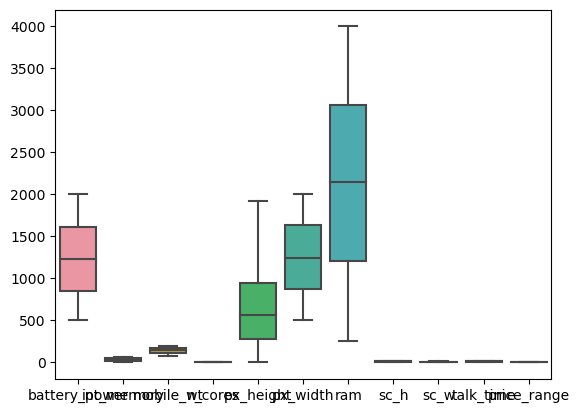

In [44]:
# Melihat boxplot untuk visualisasi model
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=data1)
plt.show()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x1=data1.drop('price_range',axis=1)
y1=data1['price_range']

In [47]:
x1

,battery_power,int_memory,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842.0,7.0,188.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0
1,1021.0,53.0,136.0,3.0,905.0,1988.0,2631.0,17.0,3.0,7.0
2,563.0,41.0,145.0,5.0,1263.0,1716.0,2603.0,11.0,2.0,9.0
3,615.0,10.0,131.0,6.0,1216.0,1786.0,2769.0,16.0,8.0,11.0
4,1821.0,44.0,141.0,2.0,1208.0,1212.0,1411.0,8.0,2.0,15.0
...,...,...,...,...,...,...,...,...,...,...
1995,794.0,2.0,106.0,6.0,1222.0,1890.0,668.0,13.0,4.0,19.0
1996,1965.0,39.0,187.0,4.0,915.0,1965.0,2032.0,11.0,10.0,16.0
1997,1911.0,36.0,108.0,8.0,868.0,1632.0,3057.0,9.0,1.0,5.0
1998,1512.0,46.0,145.0,5.0,336.0,670.0,869.0,18.0,10.0,19.0


In [48]:
y1

0       1.0
1       2.0
2       2.0
3       2.0
4       1.0
       ... 
1995    0.0
1996    2.0
1997    3.0
1998    0.0
1999    3.0
Name: price_range, Length: 2000, dtype: float64

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x1.values, y1.values, test_size=0.1, random_state=42)

In [50]:
x_train

array([[1745.,    3.,  105., ...,    5.,    0.,    2.],
       [ 535.,   54.,  145., ...,   14.,    8.,   10.],
       [1577.,   42.,  197., ...,   19.,    6.,   12.],
       ...,
       [1829.,   15.,  160., ...,   16.,   11.,   12.],
       [1927.,   11.,  190., ...,   16.,   11.,   18.],
       [ 635.,   50.,   97., ...,   13.,   12.,   12.]])

In [51]:
x_test

array([[1.646e+03, 2.500e+01, 2.000e+02, ..., 8.000e+00, 6.000e+00,
        1.100e+01],
       [1.182e+03, 8.000e+00, 1.380e+02, ..., 1.900e+01, 1.700e+01,
        1.900e+01],
       [1.972e+03, 1.400e+01, 1.960e+02, ..., 8.000e+00, 1.000e+00,
        8.000e+00],
       ...,
       [1.068e+03, 5.200e+01, 9.700e+01, ..., 1.600e+01, 1.000e+00,
        1.500e+01],
       [9.860e+02, 2.300e+01, 1.830e+02, ..., 1.600e+01, 9.000e+00,
        1.900e+01],
       [1.712e+03, 2.300e+01, 1.550e+02, ..., 5.000e+00, 0.000e+00,
        1.500e+01]])

In [52]:
y_train

array([1., 2., 2., ..., 2., 3., 1.])

In [53]:
params = {'C':[0.01,0.05,0.1,0.7,0.5,1,5,10,50,100],     # hyperparameter yang akan dievaluasi untuk SVC
             'kernel':['poly','rbf']}

grid_search = GridSearchCV(svc, params, cv=kfold, scoring='f1')
grid_search.fit(x_train,y_train)

C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Habil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.7, 0.5, 1, 5, 10, 50, 100],
                         'kernel': ['poly', 'rbf']},
             scoring='f1')

In [54]:
grid_search.best_params_, grid_search.cv_results_['mean_test_score'].max()


({'C': 0.01, 'kernel': 'poly'}, nan)

In [55]:
model = grid_search.best_estimator_
model.fit(x_train,y_train)

SVC(C=0.01, kernel='poly')

In [56]:
y_pred = model.predict(x_test)
y_pred

array([0., 2., 1., 3., 1., 1., 2., 0., 3., 1., 0., 0., 2., 3., 2., 2., 3.,
       3., 1., 0., 0., 1., 0., 2., 0., 1., 3., 2., 2., 0., 0., 0., 3., 0.,
       1., 1., 2., 0., 3., 0., 2., 3., 2., 0., 2., 2., 2., 0., 3., 1., 3.,
       1., 0., 0., 0., 0., 1., 3., 0., 0., 0., 3., 3., 1., 0., 0., 3., 3.,
       1., 2., 2., 2., 0., 1., 2., 0., 0., 3., 2., 2., 3., 2., 1., 0., 1.,
       3., 1., 3., 3., 0., 3., 3., 2., 1., 3., 2., 2., 3., 1., 1., 0., 0.,
       1., 0., 0., 3., 2., 0., 1., 1., 0., 0., 3., 1., 2., 2., 3., 2., 0.,
       2., 0., 3., 2., 1., 3., 3., 0., 2., 0., 2., 3., 0., 2., 2., 0., 3.,
       1., 0., 0., 2., 2., 0., 2., 2., 0., 0., 0., 1., 1., 2., 3., 1., 1.,
       0., 2., 2., 0., 1., 0., 2., 2., 3., 2., 2., 1., 0., 0., 2., 2., 3.,
       3., 0., 0., 0., 3., 1., 1., 2., 0., 0., 0., 0., 0., 0., 3., 2., 0.,
       3., 0., 0., 0., 0., 1., 3., 3., 1., 0., 1., 1., 0.])

In [57]:
f1_score(y_test,y_pred, average='weighted')

0.9138719210125484


------------------------Machine Learning - Classification------------------------


Classification Report for Data Test

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91        59
         1.0       0.97      0.78      0.86        49
         2.0       0.90      0.98      0.94        45
         3.0       1.00      0.89      0.94        47

    accuracy                           0.92       200
   macro avg       0.93      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200

--------------------------------------------------------------------------


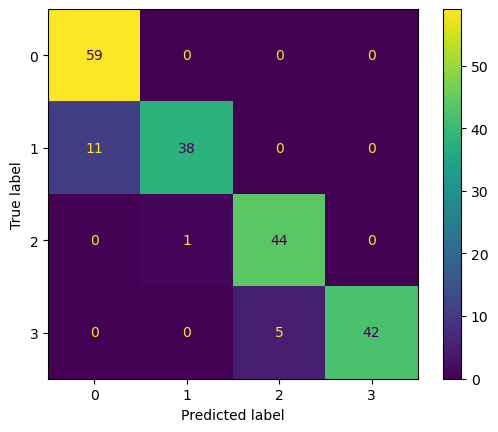

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def evaluation_parametrics(name,y_val, y_pred):
    
    print("\n------------------------{}------------------------\n".format(name))

    cm_test = confusion_matrix(y_val, y_pred)
    t1 = ConfusionMatrixDisplay(cm_test)    
    print("\nClassification Report for Data Test\n")
    print(classification_report(y_val, y_pred))   
    print("--------------------------------------------------------------------------")

    t1.plot()
    
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)

In [59]:
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[[0. 0.]
 [2. 2.]
 [1. 1.]
 [3. 3.]
 [1. 1.]
 [1. 1.]
 [2. 2.]
 [0. 0.]
 [3. 3.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [2. 2.]
 [3. 3.]
 [3. 2.]
 [2. 2.]
 [3. 3.]
 [3. 3.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [2. 1.]
 [1. 0.]
 [2. 2.]
 [0. 0.]
 [1. 1.]
 [3. 3.]
 [2. 2.]
 [2. 2.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [3. 3.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [2. 2.]
 [0. 0.]
 [3. 3.]
 [0. 0.]
 [2. 2.]
 [3. 3.]
 [2. 2.]
 [0. 0.]
 [2. 2.]
 [3. 2.]
 [2. 2.]
 [1. 0.]
 [3. 3.]
 [1. 1.]
 [3. 3.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [3. 3.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [3. 3.]
 [3. 3.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [3. 3.]
 [3. 3.]
 [1. 1.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [0. 0.]
 [1. 1.]
 [2. 2.]
 [0. 0.]
 [1. 0.]
 [3. 3.]
 [2. 2.]
 [2. 2.]
 [3. 3.]
 [2. 2.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [3. 3.]
 [1. 1.]
 [3. 3.]
 [3. 3.]
 [0. 0.]
 [3. 3.]
 [3. 3.]
 [2. 2.]
 [1. 1.]
 [3. 3.]
 [2. 2.]
 [2. 2.]
 [3. 3.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [3. 3.]
 [2. 2.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 

In [60]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model, x_test, y_test, n_repeats=10,
                                scoring='f1_weighted', random_state=42)

In [61]:
col = ['ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt', 'int_memory', 'n_cores', 'sc_h', 'sc_w', 'talk_time']
x_test = pd.DataFrame(data=x_test,columns=col)
x_test

,ram,battery_power,px_width,px_height,mobile_wt,int_memory,n_cores,sc_h,sc_w,talk_time
0,1646.0,25.0,200.0,2.0,211.0,1608.0,686.0,8.0,6.0,11.0
1,1182.0,8.0,138.0,8.0,275.0,986.0,2563.0,19.0,17.0,19.0
2,1972.0,14.0,196.0,7.0,293.0,952.0,1316.0,8.0,1.0,8.0
3,989.0,17.0,166.0,3.0,256.0,1394.0,3892.0,18.0,7.0,19.0
4,615.0,58.0,130.0,5.0,1021.0,1958.0,1906.0,14.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...
195,1986.0,51.0,165.0,8.0,282.0,1358.0,1614.0,17.0,12.0,3.0
196,1510.0,47.0,138.0,2.0,118.0,1170.0,887.0,18.0,6.0,5.0
197,1068.0,52.0,97.0,8.0,994.0,1500.0,1436.0,16.0,1.0,15.0
198,986.0,23.0,183.0,8.0,471.0,800.0,2385.0,16.0,9.0,19.0


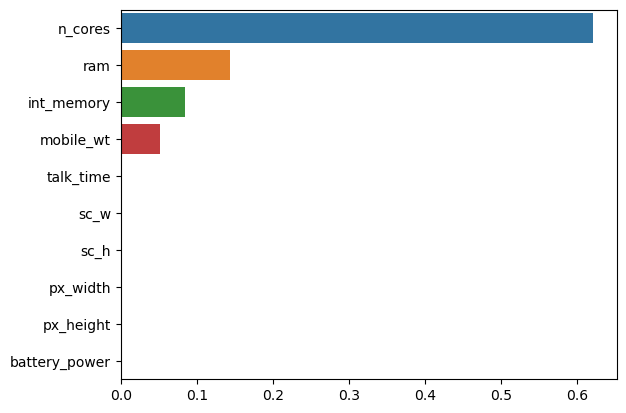

In [62]:
result_sorted = []
columns_sorted = []

for res, col in sorted(zip(result.importances_mean, x_test.columns.values), reverse=True):
  result_sorted.append(res)
  columns_sorted.append(col)

sns.barplot(x = result_sorted, y = columns_sorted)
plt.show()

In [63]:
import joblib
joblib.dump(model,'model_klasifikasi_price.pkl')

['model_klasifikasi_price.pkl']